In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

Formatting helper function

In [26]:
def convert_dict_to_df(dictionary, features, remove_NaN=True, 
                        remove_all_zeroes=True, remove_any_zeroes=False, 
                        sort_keys=False):
    """
    Convert dictionary to a pandas data frame of features.
    
    Args:
        dictionary: Dictionary containing the feature names as keys and the 
            corresponding values.
        features: List of feature names. First feature passed needs to be 'poi'.
        remove_NaN: True converts all "NaN" strings to 0.
        remove_all_zeroes: True omits all 0 data points.
        remove_any_zeroes: True omits single 0 data points.
        sort_keys: True sorts the dictionary keys in alphabetical order before
            adding the data points to the data frame.

    Returns:
        Function returns a pandas data frame with each row representing a data 
        point with the specified features in its columns.
    """

    # check that first feature passed is 'poi'
    assert (features[0] == 'poi'), "The first feature needs to be 'poi'!"

    # data frame to store the data points as individual rows
    df = pd.DataFrame(columns=['name'] + features)

    # sort keys alphabetically if sort_keys is set to True
    if sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    # loop trough the data dictionary 
    for key in keys:
        
        val_dict = {'name': key} # first entry of data point is the name of the person

        for feature in features:
            # check if specified feature exists, throw a warning if not and 
            # stop the function
            try:
                val = dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return

            val = dictionary[key][feature] #???

            # set NaN values to 0 if remove_NaN is set to True
            if val == "NaN" and remove_NaN:
                val = 0
            val_dict[feature] = val

        # do not add all zero data points if remove_all_zeroes is set to True
        if remove_all_zeroes:
            append = False
            for key, val in val_dict.items():
                # exclude 'name' and 'poi' from criteria
                if key not in ['name', 'poi']:
                    if val != 0 and val != "NaN":
                        append = True
                        break

        # don not add single zero data points if remove_any_zeroes is set to 
        # True
        elif remove_any_zeroes:
            append = True
            if 0 in list(val_dict.values()) or "NaN" in list(val_dict.values()): 
                append = False

        # all data points are added 
        else:
            append = True

        # append data point if it is flagged for addition
        if append:
            df = df.append(val_dict, ignore_index=True)
    
    return df

Import Data

In [42]:
# load dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

# feature list
features = ['poi', 'bonus', 'deferral_payments', 'deferred_income', 
            'director_fees', 'exercised_stock_options', 'expenses', 
            'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 
            'restricted_stock_deferred', 'salary', 'total_payments', 
            'total_stock_value', 'email_address', 'from_messages', 
            'from_poi_to_this_person', 'from_this_person_to_poi', 
            'shared_receipt_with_poi', 'to_messages']

# convert specified features to data frame
data_df = convert_dict_to_df(data_dict, features, remove_NaN=True, 
                        remove_all_zeroes=True, remove_any_zeroes=False, 
                        sort_keys=True)

print("Number of all zero data points: {}".format(len(list(data_dict.keys())) - len(data_df)))

Number of all zero data points: 1


In [28]:
data_df.head()

,name,poi,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,loan_advances,long_term_incentive,...,restricted_stock_deferred,salary,total_payments,total_stock_value,email_address,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
0,ALLEN PHILLIP K,False,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,0.0,304805.0,...,-126027.0,201955.0,4484442.0,1729541.0,phillip.allen@enron.com,2195.0,47.0,65.0,1407.0,2902.0
1,BADUM JAMES P,False,0.0,178980.0,0.0,0.0,257817.0,3486.0,0.0,0.0,...,0.0,0.0,182466.0,257817.0,0,0.0,0.0,0.0,0.0,0.0
2,BANNANTINE JAMES M,False,0.0,0.0,-5104.0,0.0,4046157.0,56301.0,0.0,0.0,...,-560222.0,477.0,916197.0,5243487.0,james.bannantine@enron.com,29.0,39.0,0.0,465.0,566.0
3,BAXTER JOHN C,False,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,1586055.0,...,0.0,267102.0,5634343.0,10623258.0,0,0.0,0.0,0.0,0.0,0.0
4,BAY FRANKLIN R,False,400000.0,260455.0,-201641.0,0.0,0.0,129142.0,0.0,0.0,...,-82782.0,239671.0,827696.0,63014.0,frank.bay@enron.com,0.0,0.0,0.0,0.0,0.0


Data exploration

In [34]:
# summary of object type features
data_df.describe(include=[np.object])

,name,poi,email_address
count,145,145,145
unique,145,2,112
top,TAYLOR MITCHELL S,False,0
freq,1,127,34


In [35]:
# summary of numeric features
data_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
count,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.342671e+06,4.418227e+05,-3.854019e+05,1.955643e+04,4.211583e+06,7.123619e+04,1.157586e+06,6.692680e+05,5.894693e+05,1.761321e+06,2.065786e+04,3.683342e+05,4.380626e+06,5.886335e+06,361.075862,38.489655,24.455172,697.765517,1230.013793
std,8.121319e+06,2.750583e+06,2.386279e+06,1.194559e+05,2.615843e+07,4.341759e+05,9.682311e+06,4.059716e+06,3.694784e+06,1.093676e+07,1.444650e+06,2.211001e+06,2.702539e+07,3.636916e+07,1445.944684,74.088359,79.527073,1075.128126,2232.153003
min,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000e+00,-4.409300e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,-3.834600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.246000e+04,0.000000e+00,0.000000e+00,1.025000e+05,2.520550e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.087500e+05,2.153000e+04,0.000000e+00,0.000000e+00,9.720000e+02,3.605280e+05,0.000000e+00,2.106920e+05,9.665220e+05,9.760370e+05,17.000000,4.000000,0.000000,114.000000,312.000000
75%,8.000000e+05,1.025900e+04,0.000000e+00,0.000000e+00,1.729541e+06,5.394700e+04,0.000000e+00,3.753040e+05,1.506560e+05,8.530640e+05,0.000000e+00,2.714420e+05,1.979596e+06,2.332399e+06,52.000000,41.000000,14.000000,900.000000,1607.000000
max,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,3.098866e+08,4.345095e+08,14368.000000,528.000000,609.000000,5521.000000,15149.000000


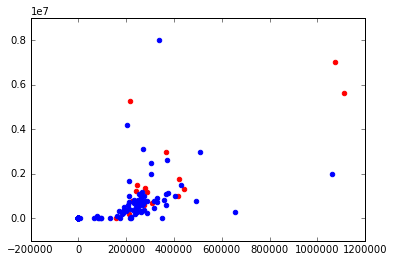

In [45]:
# drop 'TOTAL' row
data_df = data_df[data_df['name'] != 'TOTAL']

# split df into poi and non poi data
poi_df = data_df[data_df['poi'] == True]
non_poi_df = data_df[data_df['poi'] == False]

# salary vs. bonus
plt.scatter(poi_df['salary'], poi_df['bonus'], color='r')
plt.scatter(non_poi_df['salary'], non_poi_df['bonus'], color='b')
plt.show()

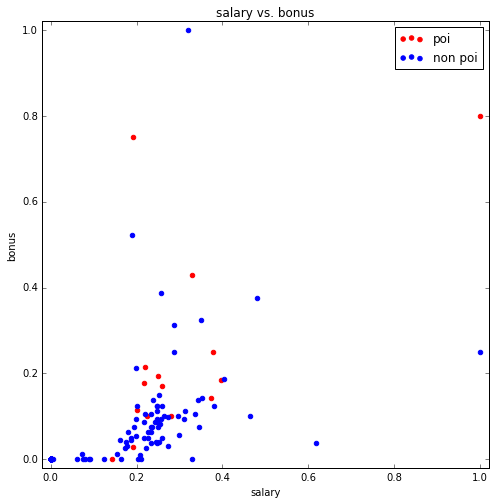

In [67]:
def scatter_plot(df, x, y, normalize=True):
    """
    
    """
    poi_df = df[df['poi'] == True]
    x_poi = poi_df[x].values.reshape(-1, 1)
    y_poi = poi_df[y].values.reshape(-1, 1)
    
    non_poi_df = df[df['poi'] == False]
    x_non_poi = non_poi_df[x].values.reshape(-1, 1)
    y_non_poi = non_poi_df[y].values.reshape(-1, 1)
    
    if normalize:
        x_poi = MinMaxScaler().fit_transform(x_poi)
        y_poi = MinMaxScaler().fit_transform(y_poi)
        
        x_non_poi = MinMaxScaler().fit_transform(x_non_poi)
        y_non_poi = MinMaxScaler().fit_transform(y_non_poi)
    
    # create plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(x_poi, y_poi, color="red", label="poi")
    ax.scatter(x_non_poi, y_non_poi, color="blue", label="non poi")
    ax.set(title="{} vs. {}".format(x, y), xlabel=x, xlim=[-0.02, 1.02], ylabel=y, ylim=[-0.02, 1.02])
    plt.legend()
    
    plt.show()

scatter_plot(data_df, 'salary', 'bonus')